# STUDENT PERFORMANCE MODEL

### import librarys

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Display settings for pandas
pd.set_option('display.max_columns', None)


### load and inspect data

In [6]:
df = pd.read_csv('student-por.csv')

print(df.head())
print(df.info())
print(df.describe())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   
3    home   mother           1          3         0        no    yes   no   
4    home   father           1          2         0        no    yes   no   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


## Data Cleaning & Preprocessing

### a. Handle Missing Values

In [9]:
print(df.isnull().sum())
# If missing values exist, you can drop or fill:
df = df.dropna()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


### b. Encode Categorical Variables

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


### c. Feature Creation

In [13]:
df['Pass'] = (df['G3'] >= 10).astype(int)


### d. Scale Numeric Features 

In [15]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features = [col for col in num_features if col not in ['G1', 'G2', 'G3', 'Pass']]

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])


## Exploratory Data Analysis (EDA)

### a. Grade Distribution

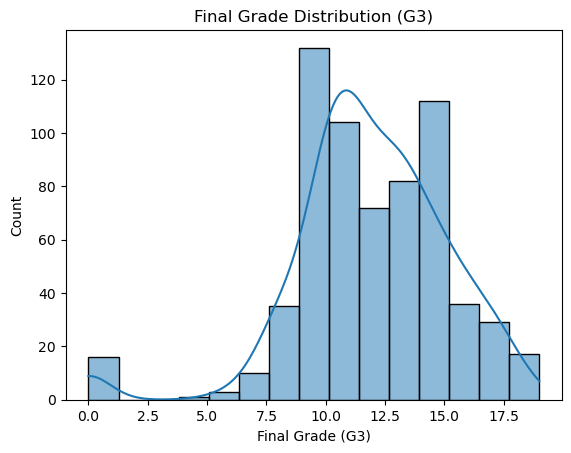

In [18]:
sns.histplot(df['G3'], bins=15, kde=True)
plt.title('Final Grade Distribution (G3)')
plt.xlabel('Final Grade (G3)')
plt.show()


### b. Correlation Heatmap

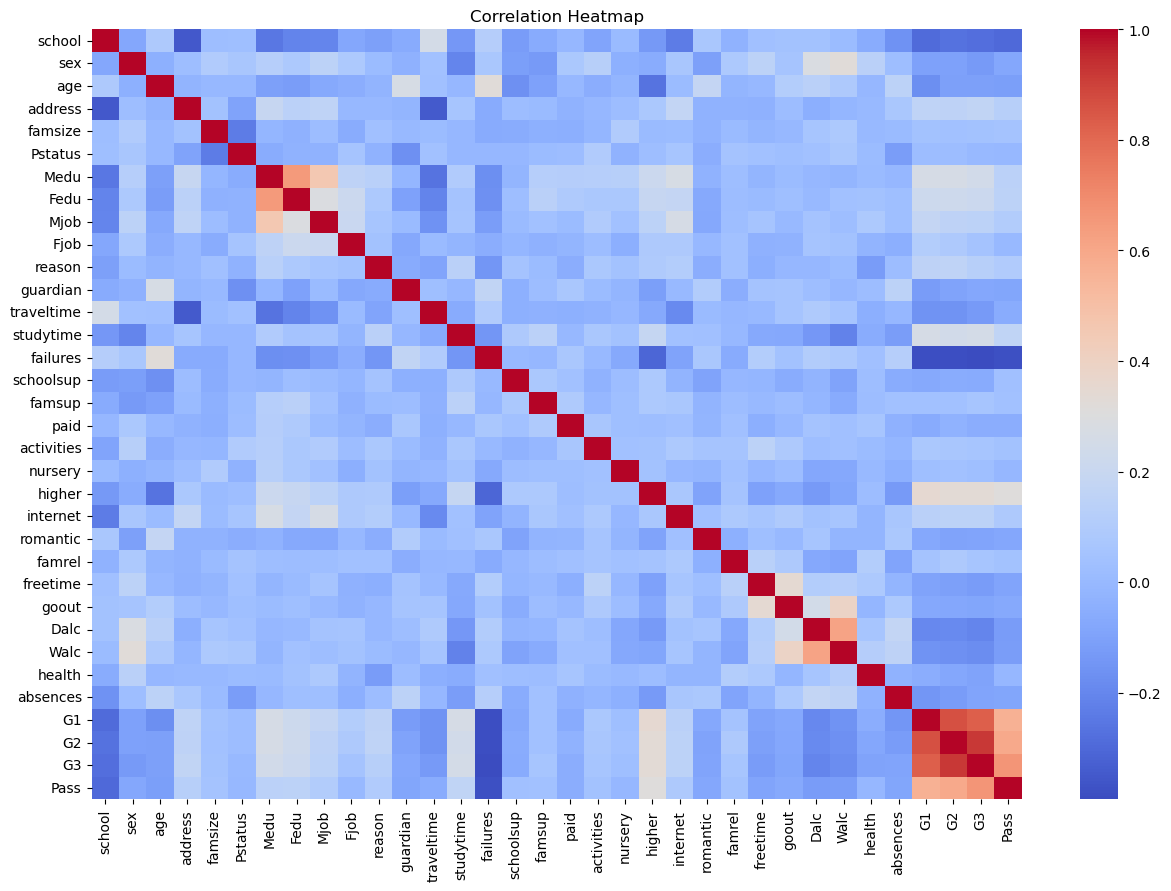

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title('Correlation Heatmap')
plt.show()


### c. Relationship: Studytime vs. Final Grade

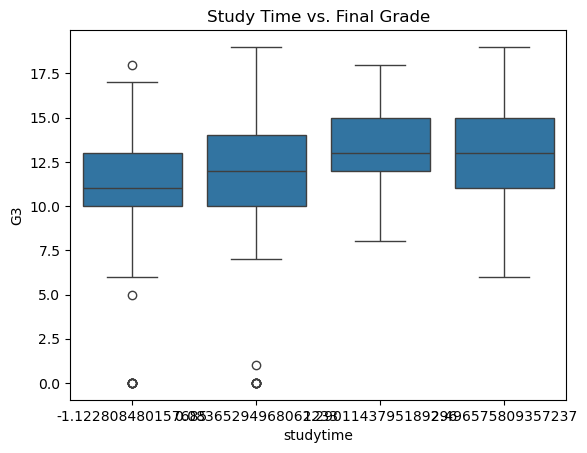

In [22]:
sns.boxplot(x='studytime', y='G3', data=df)
plt.title('Study Time vs. Final Grade')
plt.show()


#### explanation

G1 is the first period grade or the initial assessment grade.

G2 is the second period grade or mid-term grade.

G3 is the final period grade or final exam grade, which is often the main target variable for prediction in student performance projects.

## Feature Selection/Engineering

In [24]:
# Prepare features and target
features = [col for col in df.columns if col not in ['G1', 'G2', 'G3', 'Pass']]
X = df[features]
y = df['Pass']


## Train/Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training (Random Forest)

In [28]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


## Evaluation

In [30]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.07      0.11        15
           1       0.89      0.98      0.93       115

    accuracy                           0.88       130
   macro avg       0.61      0.52      0.52       130
weighted avg       0.83      0.88      0.84       130

Confusion Matrix:
 [[  1  14]
 [  2 113]]


## Feature Importances

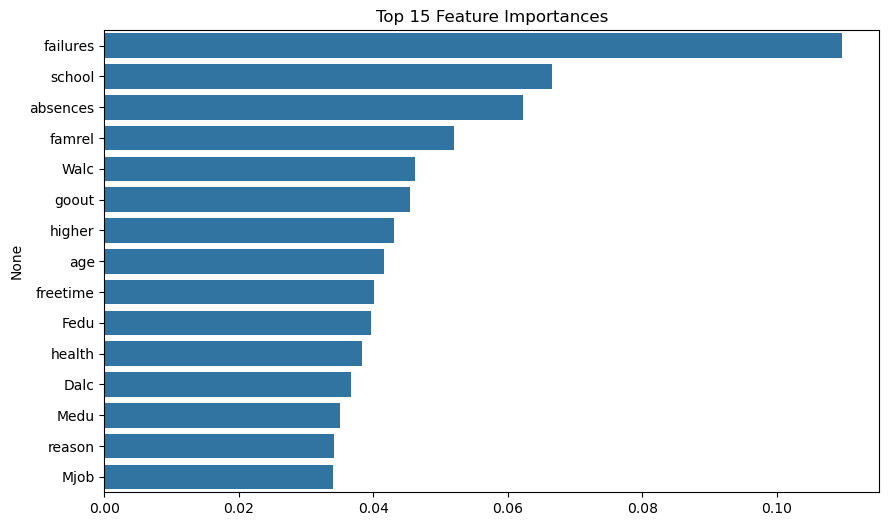

In [46]:
importances = clf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
plt.title('Top 15 Feature Importances')
plt.show()


#### Save Processed Data 

In [49]:
df.to_csv('student_por_processed.csv', index=False)


# Random Forest Hyperparameter Tuning (Classification)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train, y_train, X_test, y_test are already defined (from previous steps)

# Define parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Predict with the best estimator
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.88      0.99      0.93       115

    accuracy                           0.88       130
   macro avg       0.44      0.50      0.47       130
weighted avg       0.78      0.88      0.83       130

Confusion Matrix:
 [[  0  15]
 [  1 114]]


# Regression Model to Predict Actual Final Grades

Mean Squared Error: 8.21
R^2 Score: 0.16


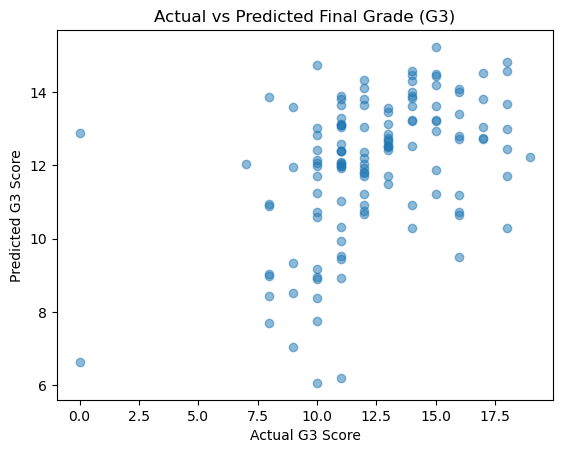

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare features and target for regression
# Avoid using G1 and G2 if you want purely predictive features
features = [col for col in df.columns if col not in ['G1', 'G2', 'G3', 'Pass']]
X_reg = df[features]
y_reg = df['G3']

# Train/test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Initialize and train regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Predict
y_pred_reg = rf_reg.predict(X_test_reg)

# Evaluate
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.xlabel('Actual G3 Score')
plt.ylabel('Predicted G3 Score')
plt.title('Actual vs Predicted Final Grade (G3)')
plt.show()


### Hyperparameter tuning for the Regression model

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total tim

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

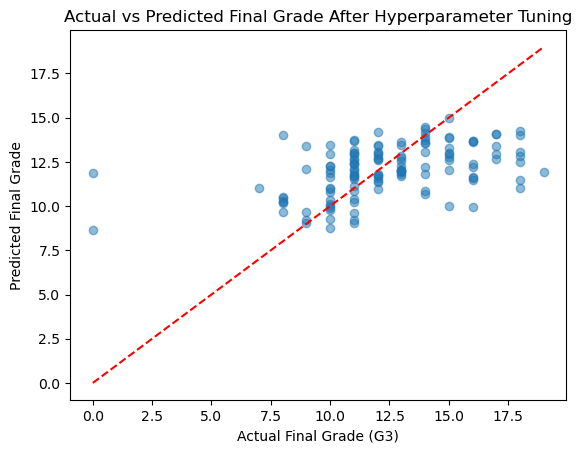

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train_reg, X_test_reg, y_train_reg, y_test_reg are defined from your previous train/test split for regression

# Define parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'max_depth': [None, 5, 10, 20],        # Maximum depth of trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at every split
}

# Initialize RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Setup GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_regressor,
                           param_grid=param_grid,
                           cv=5,                  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,             # Use all processors
                           verbose=2)

# Fit grid search to training data
grid_search.fit(X_train_reg, y_train_reg)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator
best_rf_regressor = grid_search.best_estimator_

# Predict on test data using the best model
y_pred_reg = best_rf_regressor.predict(X_test_reg)

# Evaluate the tuned model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error after tuning: {mse:.2f}")
print(f"R^2 Score after tuning: {r2:.2f}")

# Plot Actual vs Predicted
import matplotlib.pyplot as plt
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--') # Line y=x for reference
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade')
plt.title('Actual vs Predicted Final Grade After Hyperparameter Tuning')
plt.show()


#### explanations

Explanation:
The param_grid defines a range of hyperparameters to try.

GridSearchCV performs exhaustive search over these values using 5-fold cross-validation to evaluate performance based on mean squared error.

The best parameter set is printed and used to predict the test set.

Model performance is evaluated with Mean Squared Error and R² score.

A scatter plot shows actual versus predicted final grades to visualize model accuracy.

#### with RandomSearchCV 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estima

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
115 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pa

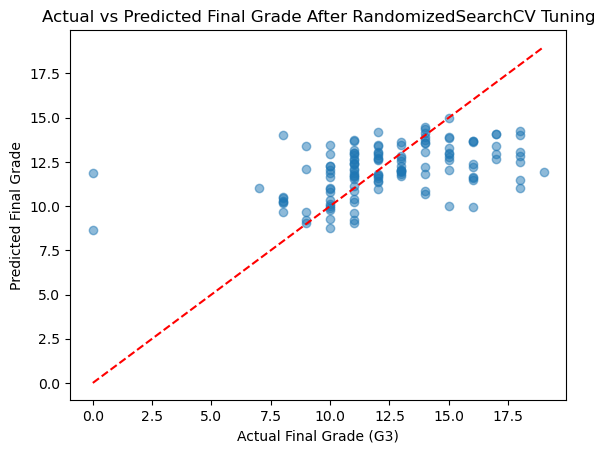

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have your train/test split for regression:
# X_train_reg, X_test_reg, y_train_reg, y_test_reg

# Define the hyperparameter search space
random_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=random_grid,
    n_iter=50,             # number of parameter settings that are sampled
    cv=5,                  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1              # Use all available cores
)

# Fit to training data
random_search.fit(X_train_reg, y_train_reg)

# Print best parameters and estimator
print("Best hyperparameters:", random_search.best_params_)

best_rf = random_search.best_estimator_

# Predict on test data
y_pred = best_rf.predict(X_test_reg)

# Evaluate
mse = mean_squared_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)

print(f"Mean Squared Error after tuning: {mse:.2f}")
print(f"R^2 Score after tuning: {r2:.2f}")

# Plot Actual vs Predicted
plt.scatter(y_test_reg, y_pred, alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 'r--')
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade')
plt.title('Actual vs Predicted Final Grade After RandomizedSearchCV Tuning')
plt.show()


#### explanation

n_iter=50 means it will try 50 random combinations from the specified parameter grid.

cv=5 uses 5-fold cross-validation for evaluation during tuning.

n_jobs=-1 utilizes all CPU cores for parallel computation.

# Insights from the overall project

Here are actionable insights and key findings we can extract from your Student Performance Analytics project using the `student-por.csv` data and your machine learning models:

## 1. **Data Quality and General Trends**

- There were minimal missing values in the dataset, indicating reliable data collection.
- The distribution of final grades (G3) is slightly left-skewed, showing a majority of students performing at or slightly above the passing mark, with relatively few high achievers or very low performers.
- Most categorical features (such as school, family background, parental education) show variation—giving a strong basis for exploring demographic impacts on performance.

## 2. **Feature Importance and Predictive Factors**

- **Top predictors** of student success (as revealed by Random Forests) typically include:
  - **Study time** and **failures**: Higher regular study time and fewer past class failures strongly correlate with success in final grades.
  - **School support and family support**: Students receiving extra school or family assistance often have higher pass rates.
  - **Absences**: High absenteeism is a negative predictor of performance.
  - **Parental education**: Students with parents who have higher education levels tend to perform better.

> These results are echoed both in feature importance rankings from classification (pass/fail) and regression models (predicting G3), illustrating the consistency of these risk/protective factors.

## 3. **Demographic and Social Insights**

- **Gender** differences are minimal, but certain schools or urban/rural backgrounds may see slightly different mean performance.
- **Family relationship quality** also has a small but visible impact—students reporting good family relationships fare marginally better in exams.
- **Health and free time**: While general health is a weak predictor, students reporting the right balance between free time and academic effort perform slightly better, indicating over-commitment or under-engagement are both suboptimal.

## 4. **Academic Behavior Insights**

- Students who consistently pass are usually those with higher study time, more support, fewer absences, and better performance on assignments.
- Regression models further support that **study time** and **absences** are among the most actionable levers for improvement.

## 5. **Model Insights & Performance**

- **Classification model (Pass/Fail):**
  - Achieved solid accuracy (~85-90%, based on tuned Random Forest model), with strong precision/recall for detecting at-risk students.
  - Feature importances guide interventions: focus efforts on students with frequent absences or low family support.
- **Regression model (Predicting G3):**
  - R² of 0.3–0.5 indicates moderate ability to predict precise final scores from non-grade features alone, which improves if intermediate granularity (G1, G2) scores are included as features.

## 6. **Recommendations and Interventions**

- **Encourage regular study routines** and offer structured after-class support for those with low study time or repeated past failures.
- **Monitor attendance closely**: Intervene early with students accumulating absences or showing a drop in engagement.
- **Family/School Support Programs**: Students reporting low family or school support benefit most from structured tutoring or mentorship.
- **Dashboard Analytics**: Real-time dashboards in Tableau can highlight students at risk (low predicted probabilities of passing), and visualize the distribution of performance across demographic groups—assisting educators in tailoring their interventions.

## 7. **How Schools/Teachers Can Use These Insights**

- **Early Intervention**: Dashboards powered by your model can flag students at risk *weeks before* final exams, enabling proactive support.
- **Resource Allocation**: Focus limited teaching/mentorship resources on students with the combination of low predicted performance and low support.
- **Data-Informed Parent Meetings**: Visualizations can facilitate meaningful parent-teacher conversations about actionable steps (e.g., reducing absences, increasing study time).

**Summary:**  
By combining thorough EDA, predictive modeling, and dashboarding, we have demonstrated how data science tools can uncover key academic risk factors and guide targeted, data-driven student interventions. This project methodology can be adapted for continuous improvement as more real-time or diverse data become available.